In [1]:
##loading module
import numpy as np
import pandas as pd
import cv2
from keras.models import load_model
import keras.backend as k1
from sklearn.model_selection import train_test_split
from skimage.io import imread,imshow
from skimage.transform import resize
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,MaxPooling2D,Dropout
from keras.regularizers import l2
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from glob import glob
from keras.models import Model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

2022-12-29 14:05:01.522518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 14:05:02.292728: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-29 14:05:02.292800: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-29 14:05:02.417874: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already

In [5]:
'''
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        s=imread(h,as_gray=True)
        s=resize(s,(50,50))
        extract.append([np.array(s),j])
print(len(extract))
ex=extract        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


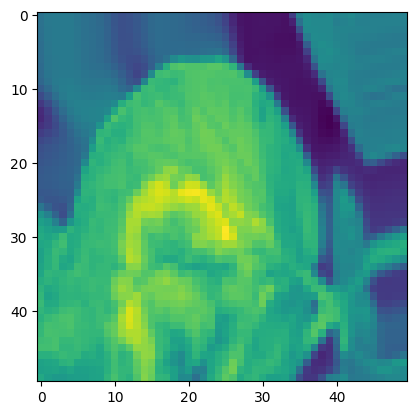

In [6]:
plt.imshow(extract[100][0])

In [13]:
x=[]
y=[]
for features,class_value in extract:
    x.append(features)
    y.append(class_value)
x=np.array(x)
y=np.array(y)
x=x.reshape(x.shape[0],50,50,1)
print(x.shape)

(1608, 50, 50, 1)


In [14]:
lb=LabelEncoder()
y=to_categorical(lb.fit_transform(y))
y


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [24]:
print(x.shape,y.shape)
k1.clear_session()

NameError: name 'x' is not defined

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12345)

In [37]:
model=Sequential()
model.add(Conv2D(128,(3,3),padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(4,4))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               73856     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

In [25]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=20,batch_size=128,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
9/9 [==============================] - 8s 836ms/step - loss: 1.5244 - accuracy: 0.2942 - val_loss: 1.4442 - val_accuracy: 0.3168
Epoch 2/20
9/9 [==============================] - 8s 944ms/step - loss: 1.4528 - accuracy: 0.3467 - val_loss: 1.3942 - val_accuracy: 0.3789
Epoch 3/20
9/9 [==============================] - 8s 915ms/step - loss: 1.3544 - accuracy: 0.4311 - val_loss: 1.2427 - val_accuracy: 0.4658
Epoch 4/20
9/9 [==============================] - 9s 952ms/step - loss: 1.2093 - accuracy: 0.4871 - val_loss: 1.0896 - val_accuracy: 0.4928
Epoch 5/20
9/9 [==============================] - 6s 630ms/step - loss: 1.0650 - accuracy: 0.5191 - val_loss: 0.9956 - val_accuracy: 0.5652
Epoch 6/20
9/9 [==============================] - 6s 676ms/step - loss: 0.9721 - accuracy: 0.5493 - val_loss: 0.8847 - val_accuracy: 0.6273
Epoch 7/20
9/9 [==============================] - 6s 630ms/step - loss: 0.8786 - accuracy: 0.5884 - val_loss: 0.8948 - val_accuracy: 0.6501
Epoch 8/20
9/9 [====

In [29]:
s=["backleg","early-blight","late-blight","safe","septoria"]


TypeError: cannot pickle 'weakref.ReferenceType' object

In [27]:
p=imread("index.jpeg",as_gray=True)
p=resize(p,(50,50))
p=p.reshape(1,50,50,1)
p=model.predict(p)
print(s[np.argmax(p)])

backleg


In [52]:
k1.clear_session()
##dnn
dnn=Sequential()
dnn.add(Dense(100,activation="relu",input_shape=(50,50,1)))
dnn.add(Dropout(0.1))
dnn.add(Dense(100,activation="relu"))
dnn.add(Dropout(0.1))
dnn.add(Dense(100,activation="relu"))
dnn.add(Flatten())
dnn.add(Dense(5,activation="softmax"))
dnn.summary()
dnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50, 50, 100)       200       
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 100)       0         
_________________________________________________________________
dense_1 (Dense)              (None, 50, 50, 100)       10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 100)       0         
_________________________________________________________________
dense_2 (Dense)              (None, 50, 50, 100)       10100     
_________________________________________________________________
flatten (Flatten)            (None, 250000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1

In [53]:
history1=dnn.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
9/9 [==============================] - 22s 2s/step - loss: 1.7019 - accuracy: 0.2027 - val_loss: 1.4730 - val_accuracy: 0.3602
Epoch 2/20
9/9 [==============================] - 23s 3s/step - loss: 1.3871 - accuracy: 0.4320 - val_loss: 1.2968 - val_accuracy: 0.5010
Epoch 3/20
9/9 [==============================] - 23s 3s/step - loss: 1.2260 - accuracy: 0.5333 - val_loss: 1.1075 - val_accuracy: 0.5342
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 1.0310 - accuracy: 0.5742 - val_loss: 1.1248 - val_accuracy: 0.5010
Epoch 5/20
9/9 [==============================] - 25s 3s/step - loss: 0.9697 - accuracy: 0.5973 - val_loss: 0.9558 - val_accuracy: 0.5901
Epoch 6/20
9/9 [==============================] - 20s 2s/step - loss: 0.8712 - accuracy: 0.6587 - val_loss: 0.9948 - val_accuracy: 0.5756
Epoch 7/20
9/9 [==============================] - 26s 3s/step - loss: 0.8209 - accuracy: 0.6711 - val_loss: 0.8944 - val_accuracy: 0.6273
Epoch 8/20
9/9 [==================

In [59]:
##svm using keras-cnn
k1.clear_session()
svm=Sequential()
svm.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(50,50,1)))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Flatten())
svm.add(Dense(128,activation="relu"))

#Output layer
svm.add(Dense(5,kernel_regularizer=l2(0.01),activation = "linear"))
svm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6

In [60]:
svm.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
svm.fit(x_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(x_test,y_test))

Epoch 1/20
9/9 [==============================] - 4s 337ms/step - loss: 0.8059 - accuracy: 0.2667 - val_loss: 0.7239 - val_accuracy: 0.3209
Epoch 2/20
9/9 [==============================] - 3s 305ms/step - loss: 0.7038 - accuracy: 0.3244 - val_loss: 0.6643 - val_accuracy: 0.3996
Epoch 3/20
9/9 [==============================] - 3s 305ms/step - loss: 0.6523 - accuracy: 0.3733 - val_loss: 0.6168 - val_accuracy: 0.4182
Epoch 4/20
9/9 [==============================] - 3s 305ms/step - loss: 0.6065 - accuracy: 0.4187 - val_loss: 0.5651 - val_accuracy: 0.5280
Epoch 5/20
9/9 [==============================] - 3s 304ms/step - loss: 0.5710 - accuracy: 0.4951 - val_loss: 0.5271 - val_accuracy: 0.5921
Epoch 6/20
9/9 [==============================] - 4s 513ms/step - loss: 0.5181 - accuracy: 0.5582 - val_loss: 0.4892 - val_accuracy: 0.5735
Epoch 7/20
9/9 [==============================] - 3s 304ms/step - loss: 0.4731 - accuracy: 0.5964 - val_loss: 0.4651 - val_accuracy: 0.6004
Epoch 8/20
9/9 [====

With 3channels

In [2]:
'''
3channels
Extract features from images '''
path="augmented-image/"
l=glob(path+"*")
s=len(glob(path+"*"))
extract_color=[]
name_items=[]
for i in l:
    name_items.append(i[16:])
print(name_items)

flat_data_arr=[] #input array
target_arr=[] #output array
for j in name_items:
    m=glob("./"+path+j+"/*")
    for h in m:
        #s=imread(h)
        #s=resize(s,(200,200))
        s = cv2.imread(h, cv2.IMREAD_COLOR)       
        s = cv2.resize(s, (100,100))
        s= cv2.cvtColor(s, cv2.COLOR_RGB2BGR)
        extract_color.append([np.array(s),j])
print(len(extract_color))
ex=extract_color        



['late-blight', 'early-blight', 'backkleg', 'septoria', 'safe']
1608


In [3]:
x1=[]
y1=[]
for features,class_value in extract_color:
    x1.append(features)
    y1.append(class_value)
x1=np.array(x1)
y1=np.array(y1)
#x=x.reshape(x.shape[0],50,50,1)
print(x1.shape)

(1608, 100, 100, 3)


In [4]:
x1=x1/255.0
x1

array([[[[0.63137255, 0.76470588, 0.29411765],
         [0.67058824, 0.78823529, 0.40784314],
         [0.74117647, 0.85098039, 0.50980392],
         ...,
         [0.39215686, 0.01960784, 0.00392157],
         [0.38823529, 0.01568627, 0.        ],
         [0.38823529, 0.01568627, 0.        ]],

        [[0.63529412, 0.76862745, 0.28627451],
         [0.6627451 , 0.78431373, 0.38039216],
         [0.72941176, 0.83921569, 0.49803922],
         ...,
         [0.40392157, 0.03137255, 0.01568627],
         [0.38823529, 0.01568627, 0.        ],
         [0.38039216, 0.00784314, 0.        ]],

        [[0.62352941, 0.75686275, 0.28627451],
         [0.65882353, 0.78431373, 0.36078431],
         [0.71372549, 0.82745098, 0.4745098 ],
         ...,
         [0.38431373, 0.01176471, 0.        ],
         [0.38823529, 0.01568627, 0.        ],
         [0.38823529, 0.01568627, 0.        ]],

        ...,

        [[0.41960784, 0.54901961, 0.38039216],
         [0.41960784, 0.54901961, 0.38039216]

In [5]:
lb=LabelEncoder()
y=lb.fit_transform(y1)

y1=to_categorical(lb.fit_transform(y1))
y1


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=42)

In [7]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.3,random_state=12345)

In [8]:
k1.clear_session()

In [43]:
model_cnn=Sequential(name="cnn")
model_cnn.add(Conv2D(128,(3,3),padding="same",activation="relu",input_shape=(100,100,3)))
model_cnn.add(MaxPooling2D(4,4))
model_cnn.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model_cnn.add(MaxPooling2D(4,4))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation="relu"))
model_cnn.add(Dense(5,activation="softmax"))
model_cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               295040  

In [44]:
model_cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
start = time.time()


history=model_cnn.fit(x_train1,y_train1,epochs=10,batch_size=128,verbose=1,validation_data=(x_test1, y_test1))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

Epoch 1/10
9/9 [==============================] - 27s 3s/step - loss: 1.4070 - accuracy: 0.3813 - val_loss: 1.1275 - val_accuracy: 0.4431
Epoch 2/10
9/9 [==============================] - 26s 3s/step - loss: 0.9154 - accuracy: 0.6009 - val_loss: 0.7649 - val_accuracy: 0.7205
Epoch 3/10
9/9 [==============================] - 26s 3s/step - loss: 0.5634 - accuracy: 0.8187 - val_loss: 0.4661 - val_accuracy: 0.7950
Epoch 4/10
9/9 [==============================] - 25s 3s/step - loss: 0.3582 - accuracy: 0.8489 - val_loss: 0.2539 - val_accuracy: 0.9503
Epoch 5/10
9/9 [==============================] - 26s 3s/step - loss: 0.2196 - accuracy: 0.9333 - val_loss: 0.1638 - val_accuracy: 0.9627
Epoch 6/10
9/9 [==============================] - 25s 3s/step - loss: 0.1369 - accuracy: 0.9716 - val_loss: 0.1811 - val_accuracy: 0.9379
Epoch 7/10
9/9 [==============================] - 25s 3s/step - loss: 0.1002 - accuracy: 0.9778 - val_loss: 0.0962 - val_accuracy: 0.9876
Epoch 8/10
9/9 [==================

In [11]:
start = time.time()

# define a sample code segment
a = 0


read_img = cv2.imread("early-blight1_0_8158.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_image=read_img.reshape(-1,100,100,3)
print(model_cnn.predict(read_image))

# record end time

end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

[[0. 1. 0. 0. 0.]]
execution time is 266.84117317199707 ms


SVM-CNN

In [40]:
##svm using keras-cnn
k1.clear_session()
svm=Sequential(name="svm")
svm.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(100,100,3)))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm.add(MaxPool2D(pool_size=(4,4),strides = 2))

svm.add(Flatten())
svm.add(Dense(128,activation="relu"))

#Output layer
svm.add(Dense(5,kernel_regularizer=l2(0.01),activation = "linear"))
svm.summary()

Model: "svm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 7744)              0         
                                                                 
 dense (Dense)               (None, 128)               991360  

In [41]:
svm.compile(optimizer="adam",loss="squared_hinge", metrics = ['accuracy'])
svm.fit(x_train1,y_train1,batch_size=128,epochs=10,verbose=1,validation_data=(x_test1,y_test1))

Epoch 1/10
9/9 [==============================] - 15s 2s/step - loss: 0.8396 - accuracy: 0.2987 - val_loss: 0.6458 - val_accuracy: 0.4286
Epoch 2/10
9/9 [==============================] - 13s 2s/step - loss: 0.5782 - accuracy: 0.5493 - val_loss: 0.5393 - val_accuracy: 0.5569
Epoch 3/10
9/9 [==============================] - 14s 1s/step - loss: 0.4130 - accuracy: 0.7893 - val_loss: 0.3698 - val_accuracy: 0.8302
Epoch 4/10
9/9 [==============================] - 13s 2s/step - loss: 0.2883 - accuracy: 0.8862 - val_loss: 0.2602 - val_accuracy: 0.8613
Epoch 5/10
9/9 [==============================] - 15s 2s/step - loss: 0.2308 - accuracy: 0.9084 - val_loss: 0.1883 - val_accuracy: 0.9648
Epoch 6/10
9/9 [==============================] - 14s 2s/step - loss: 0.1792 - accuracy: 0.9467 - val_loss: 0.1422 - val_accuracy: 0.9938
Epoch 7/10
9/9 [==============================] - 14s 2s/step - loss: 0.1252 - accuracy: 0.9929 - val_loss: 0.1072 - val_accuracy: 0.9917
Epoch 8/10
9/9 [==================

DNN

In [45]:
k1.clear_session()
##dnn
dnn=Sequential(name="dnn")
dnn.add(Dense(64,activation="relu",input_shape=(100,100,3)))
dnn.add(Dropout(0.1))
dnn.add(Dense(32,activation="relu"))

dnn.add(Flatten())
dnn.add(Dense(5,activation="softmax"))
dnn.summary()
dnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])



Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100, 100, 64)      256       
                                                                 
 dropout (Dropout)           (None, 100, 100, 64)      0         
                                                                 
 dense_1 (Dense)             (None, 100, 100, 32)      2080      
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                                 
 dense_2 (Dense)             (None, 5)                 1600005   
                                                                 
Total params: 1,602,341
Trainable params: 1,602,341
Non-trainable params: 0
_________________________________________________________________


In [46]:
start = time.time()
history1=dnn.fit(x_train1,y_train1,batch_size=128,epochs=20,verbose=1,validation_data=(x_test1,y_test1))
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

Epoch 1/20
9/9 [==============================] - 22s 2s/step - loss: 7.8616 - accuracy: 0.2844 - val_loss: 6.4761 - val_accuracy: 0.3437
Epoch 2/20
9/9 [==============================] - 23s 3s/step - loss: 3.6266 - accuracy: 0.3982 - val_loss: 1.6643 - val_accuracy: 0.4762
Epoch 3/20
9/9 [==============================] - 22s 2s/step - loss: 1.2358 - accuracy: 0.5724 - val_loss: 0.8526 - val_accuracy: 0.5445
Epoch 4/20
9/9 [==============================] - 20s 2s/step - loss: 0.5857 - accuracy: 0.7173 - val_loss: 0.4494 - val_accuracy: 0.8012
Epoch 5/20
9/9 [==============================] - 20s 2s/step - loss: 0.3689 - accuracy: 0.8409 - val_loss: 0.3517 - val_accuracy: 0.8944
Epoch 6/20
9/9 [==============================] - 19s 2s/step - loss: 0.2616 - accuracy: 0.9289 - val_loss: 0.3306 - val_accuracy: 0.9151
Epoch 7/20
9/9 [==============================] - 20s 2s/step - loss: 0.2097 - accuracy: 0.9582 - val_loss: 0.2741 - val_accuracy: 0.9027
Epoch 8/20
9/9 [==================

stackted

In [9]:
from keras.models import load_model,save_model
#save_model(dnn,"dnn.h5")
#save_model(svm,"svm.h5")
#save_model(model_cnn,"cnn.h5")

In [10]:
dnn_model=load_model("dnn.h5")
svm_model=load_model("svm.h5")
cnn_model=load_model("cnn.h5")
#model169=load_model("model169.h5")

2022-12-29 14:05:58.985924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hrithik/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-29 14:05:58.985981: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-29 14:05:58.986030: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (hrithik-Lenovo-ideapad-320-15ISK): /proc/driver/nvidia/version does not exist
2022-12-29 14:05:58.986752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
all_model=[]
all_model.append(dnn_model)
all_model.append(svm_model)
all_model.append(cnn_model)
#all_model.append(model169)

In [15]:
from keras.layers.merging import concatenate
k1.clear_session()

In [16]:
def define_stacked_model(members):
	from keras.utils import plot_model
	# update all layers in all models to not be trainable
	for i in range(len(members)):
		model = members[i]
		for layer in model.layers:
			# make not trainable
			layer.trainable = False
			# rename to avoid 'unique layer name' issue
			layer._name = 'ensemble_' + str(i+1) + '_' + layer.name
	# define multi-headed input
	ensemble_visible = [model.input for model in members]
	# concatenate merge output from each model
	ensemble_outputs = [model.output for model in members]
	merge = concatenate(ensemble_outputs)
	hidden = Dense(10, activation='relu')(merge)
	output = Dense(5, activation='softmax')(hidden)
	model = Model(inputs=ensemble_visible, outputs=output)
	# plot graph of ensemble
	plot_model(model, show_shapes=True, to_file='model_graph.png')
	# compile
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [17]:
def fit_stacked_model(model, inputX, inputy):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# encode output data
	#inputy_enc = to_categorical(inputy)
	# fit model
	x1=np.array(X)
	#print(inputy_enc.shape,x1.shape)
	model.fit(X,inputy, epochs=20, verbose=1)

# make a prediction with a stacked model
def predict_stacked_model(model, inputX):
	# prepare input data
	X = [inputX for _ in range(len(model.input))]
	# make prediction
	return model.predict(X, verbose=0)

In [18]:
import numpy as np
k1.clear_session()
stacked_model = define_stacked_model(all_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
start = time.time()

# fit stacked model on test dataset
fit_stacked_model(stacked_model, x_train1, y_train1)
# make predictions and evaluate
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

Epoch 1/20
36/36 [==============================] - 23s 614ms/step - loss: 1.1308 - accuracy: 0.4169
Epoch 2/20
36/36 [==============================] - 27s 742ms/step - loss: 0.8364 - accuracy: 0.6080
Epoch 3/20
 1/36 [..............................] - ETA: 19s - loss: 0.7141 - accuracy: 0.9062

In [38]:
save_model(stacked_model,"ensemble_cnn_dnn_svm.h5")

In [43]:
#y_cat=to
p=[]
for i in y_test1:
    i=list(i)
    p.append(i.index(1))
print(p,y_test1)


[0, 1, 1, 2, 0, 3, 1, 2, 0, 2, 0, 1, 1, 2, 3, 2, 0, 2, 2, 2, 0, 4, 0, 2, 2, 1, 2, 2, 2, 0, 3, 1, 2, 1, 3, 2, 2, 2, 3, 0, 1, 2, 0, 2, 1, 0, 3, 1, 2, 1, 0, 1, 1, 2, 1, 4, 0, 0, 2, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 2, 4, 0, 3, 0, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 4, 2, 4, 2, 1, 2, 1, 3, 1, 2, 4, 2, 2, 1, 0, 2, 0, 1, 0, 4, 2, 2, 0, 1, 1, 4, 2, 0, 0, 1, 1, 1, 1, 2, 1, 4, 2, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 3, 2, 1, 0, 2, 4, 4, 4, 1, 3, 2, 0, 0, 0, 0, 1, 0, 1, 4, 3, 0, 2, 0, 1, 0, 0, 2, 2, 3, 1, 3, 1, 0, 4, 1, 1, 3, 1, 1, 1, 0, 0, 2, 2, 3, 2, 0, 1, 4, 1, 0, 0, 0, 1, 2, 1, 1, 3, 0, 0, 2, 2, 3, 0, 0, 3, 2, 2, 1, 2, 0, 2, 3, 2, 0, 2, 3, 0, 0, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 2, 1, 0, 2, 0, 4, 3, 2, 1, 3, 1, 4, 3, 0, 2, 1, 2, 3, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 3, 2, 4, 0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 4, 2, 3, 1, 0, 0, 1, 1, 3, 4, 4, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 3, 3, 2, 0, 1, 0, 3, 1, 0, 2, 3, 1, 0, 

In [45]:
start = time.time()

yhat = predict_stacked_model(stacked_model, x_test1)
yhat = np.argmax(yhat, axis=1)
end = time.time()
print("execution time is",(end-start) * 10**3,"ms")
#print(yhat,p)
#acc = accuracy_score(p, yhat)
#print('Stacked Test Accuracy: ', acc)
#print(p)
#from sklearn.metrics import recall_score,f1_score,precision_score
##print(recall_score(p,yhat,average='micro'))
#from sklearn.metrics import recall_score,f1_score,precision_score
#print(precision_score(p,yhat,average='micro'))
##from sklearn.metrics import recall_score,f1_score,precision_score
#print(f1_score(p,yhat,average='micro'))

Stacked Test Accuracy:  0.9979296066252588
0.9979296066252588
0.9979296066252588
0.9979296066252588


In [15]:
start = time.time()

# define a sample code segment
a = 0


read_img = cv2.imread("early-blight1_0_8158.jpeg", cv2.IMREAD_COLOR)       
read_img = cv2.resize(read_img, (100,100))
read_image=read_img.reshape(-1,100,100,3)
print(dnn.predict(read_image))

# record end time

end = time.time()
print("execution time is",(end-start) * 10**3,"ms")

[[0. 0. 1. 0. 0.]]
execution time is 329.72240447998047 ms


In [12]:
#shap
import shap
shap.initjs()
class_labels=name_items
masker = shap.maskers.Image("blur(28,28)", x_train1[1].shape)

explainer = shap.Explainer(svm_model, masker, output_names=class_labels)

explainer

In [13]:
shap_values = explainer(x_test1[4:8], outputs=shap.Explanation.argsort.flip[:5])

shap_values.shape


Partition explainer: 5it [00:11, 11.57s/it]               


(4, 100, 100, 3, 5)

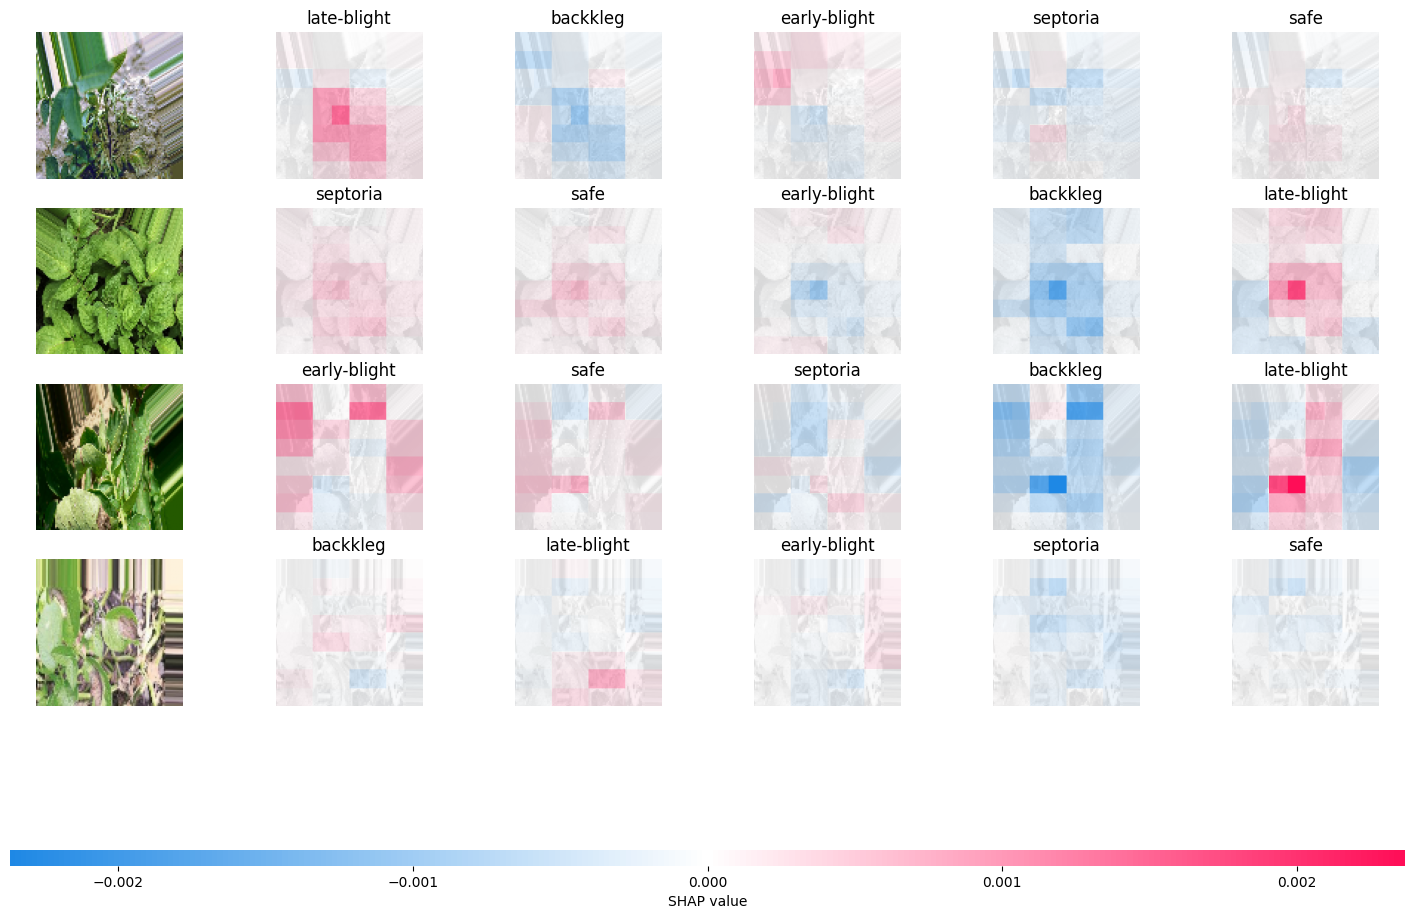

In [14]:
shap.image_plot(shap_values)

In [15]:
##vgg16 and xgboost
from keras.applications.vgg16 import VGG16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(100,100,3))

58889256/58889256 [==============================] - 6s 0us/step
